In [1]:
from utils.box_gen import *
from utils.path_help import *
import torch

In [2]:
from segment import FindLocation

fl = FindLocation()

In [3]:
all_labels = fl.get_sample_labels(0.2, "data/background/")

sample_size: 40
free mem: 6189023232
batch size: 19
Finished Pre-Segmentation


In [8]:
from segment import generate_data

print("all_labels:", all_labels)

gen = generate_data(all_labels, test=False)
sel_df = gen.get_selected_df()
sel_df

all_labels: ['sky', 'fence', 'car', 'wall', 'earth', 'booth', 'road', 'plant', 'door', 'building', 'tree', 'ceiling', 'sidewalk', 'house', 'palm']


,fg,bg
0,cat,[]
1,cctv,[]
2,dog,[]
3,raccoon,[road]
4,shrine,[]


In [9]:
def generate_yolo_dataset_beta(BACKGROUND_PATH, OBJECT_PATH, n_images=10, verbose=True):
    '''
    Main Program of JUTI (JUst Train It)
    Create a full auto generation bounding box pipeline
    '''
    # Background
    all_background_dirs = get_dirs_sorted(BACKGROUND_PATH)
    background_dirs = all_background_dirs.sample(n_images)
    n_bg = len(background_dirs)

    # Object
    object_name  = OBJECT_PATH.split("/")[-2]
    all_object_dirs = get_dirs_sorted(OBJECT_PATH)

    # Verbose to Print
    if verbose:
        print(object_name)
        print("Number of all background images:", n_bg)

    # Create Output path
    create_path("runs")
    save_path = f"runs/{object_name}"
    create_path(save_path)
    create_path(f"{save_path}/images")
    create_path(f"{save_path}/labels")

    # Loop each background to create a merged images
    img_list, loc_list = [], []
    # print(background_dirs)
    seg_images, labels = fl.segment_from_list(background_dirs.to_list(), False)
    
    for idx in tqdm(range(len(background_dirs))):
        path_bg = background_dirs.values[idx]
        path_fg = all_object_dirs.sample(1).values[0]
        # print(path_bg, path_fg)
        img_merged, loc = gen.gen_box_beta(seg_images[idx], path_bg, path_fg, verbose)
        
        if type(loc) != list:
            print("Skipp")
            continue
        
        else:
            # Save to list
            img_list.append(img_merged)
            loc_list.append(loc)

    # Save File
    save_image(img_list, PATH = save_path+"/images")
    df_loc = pd.DataFrame(loc_list, columns=['point_1', 'point_2', 'width', 'height'])
    dataframe_to_yolo_f(df_loc, img_class=object_name, PATH=save_path+"/labels")
    print(f"Finally Create {object_name}")


In [14]:
gen.set_background_size(500)
gen.set_object_size(150)

Set Background Size to 500 px
Set Object Size to 150 px


In [15]:
gen.bg_size

500

## Infer

i: 1
label_select: shrine
shrine
Number of all background images: 10
free mem: 6174343168
batch size: 19


  0%|          | 0/10 [00:00<?, ?it/s]

object_name: shrine
bg_class: ['road', 'floor', 'earth']
label_images wall,building,floor,ceiling,road,sidewalk,person,plant,car,rock,column,signboard,poster,conveyer belt,minibike
intersec_class_idx [2 4]


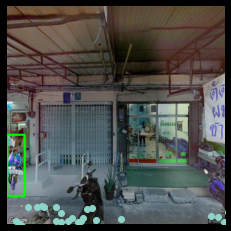

 10%|█         | 1/10 [00:00<00:01,  8.53it/s]

object_name: shrine
bg_class: ['road', 'floor', 'earth']
label_images building,sky,tree,road,sidewalk,person,plant,car,base,bus,truck,awning,booth,van,tent,bag,minibike
intersec_class_idx [3]


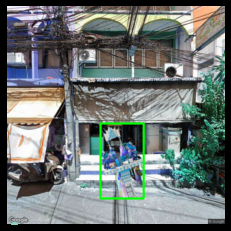

 20%|██        | 2/10 [00:00<00:01,  5.26it/s]

object_name: shrine
bg_class: ['road', 'floor', 'earth']
label_images wall,building,sky,tree,plant
intersec_class_idx []
No Select Label -> Skip
Skipp
object_name: shrine
bg_class: ['road', 'floor', 'earth']
label_images wall,building,sky,tree,road,grass,sidewalk,person,plant,car,fence,palm,streetlight,pole,ashcan
intersec_class_idx [4]


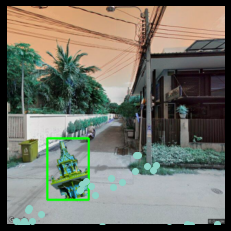

 40%|████      | 4/10 [00:00<00:00,  9.06it/s]

object_name: shrine
bg_class: ['road', 'floor', 'earth']
label_images wall,building,door,plant,base,signboard
intersec_class_idx []
No Select Label -> Skip
Skipp
object_name: shrine
bg_class: ['road', 'floor', 'earth']
label_images building,ceiling,sidewalk,base,box,signboard,awning,booth,trade name,bicycle,ashcan,bulletin board
intersec_class_idx []
No Select Label -> Skip
Skipp
object_name: shrine
bg_class: ['road', 'floor', 'earth']
label_images wall,building,floor,windowpane,person,table,plant,curtain,chair,car,shelf,lamp,base,box,fireplace,blind,flower,book,truck,awning,bag,pot
intersec_class_idx [2]


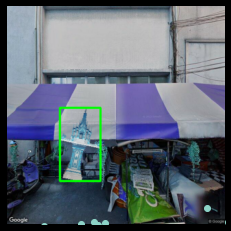

 70%|███████   | 7/10 [00:00<00:00, 14.24it/s]

object_name: shrine
bg_class: ['road', 'floor', 'earth']
label_images wall,building,sky,tree,road,sidewalk,earth,plant,fence,ashcan
intersec_class_idx [4 6]


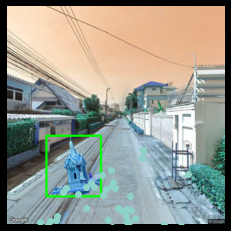

object_name: shrine
bg_class: ['road', 'floor', 'earth']
label_images wall,building,ceiling,person,earth,box,signboard,truck,awning,plaything,minibike,bicycle
intersec_class_idx [4]


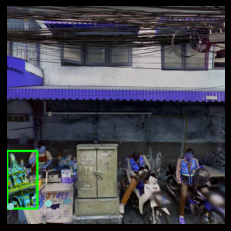

 90%|█████████ | 9/10 [00:00<00:00,  9.98it/s]

object_name: shrine
bg_class: ['road', 'floor', 'earth']
label_images wall,building,sky,floor,tree,sidewalk,earth,plant,water,fence,sand,palm,awning
intersec_class_idx [3 6]


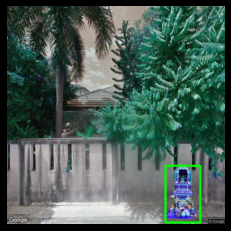

100%|██████████| 10/10 [00:01<00:00,  9.63it/s]


Finally Create shrine


In [16]:
# %%time
label_all = ['cctv', 'shrine','cat','dog','raccoon']
i = 1
print("i:", i)
label_select = label_all[i]

print("label_select:", label_select)
number_images = 10

generate_yolo_dataset_beta(f"/home/saksorn/JUTI/data/new_background/", 
                    f"/home/saksorn/JUTI/data/object/{label_select}/",
                    n_images=number_images, 
                    verbose=False)

## LOOP InFERENCE

In [14]:
# %%time
label_all = ['cctv', 'shrine','cat','dog','raccoon']
for i in range(0, 2):
# i = 3
    print("i:", i)
    label_select = label_all[i]

    print("label_select:", label_select)
    number_images = 100

    for _ in range(3):
        generate_yolo_dataset(f"/home/saksorn/JUTI/data/new_background/", 
                            f"/home/saksorn/JUTI/data/object/{label_select}/",
                            n_images=number_images, 
                            verbose=True)

i: 4
label_select: raccoon
raccoon
Number of all background images: 200
Finally Create raccoon
raccoon
Number of all background images: 200
Finally Create raccoon
raccoon
Number of all background images: 200
Finally Create raccoon


In [ ]:
for i in range(2, 5):
    print(i)